# 2QKE : number of atoms --> 392, number of conformations --> 500

# fgf2 : number of atoms --> 620 , number of conformations --> 406

# 1fq9: number of atoms --> 516 , number of conformations --> 1001

# 2p23: number of atoms --> 544, number of conformations --> 975

# libraries

In [ ]:
%pip install Biopython
%pip install pandas
%pip install matplotlib
%pip install torch
%pip install  scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.7 MB/s eta 0:00:00


# Install pymol

In [ ]:
! wget "https://pymol.org/installers/PyMOL-2.5.4_404-Linux-x86_64-py37.tar.bz2"

--2023-07-11 15:17:53--  https://pymol.org/installers/PyMOL-2.5.4_404-Linux-x86_64-py37.tar.bz2
Resolving pymol.org (pymol.org)... 18.161.97.107, 18.161.97.106, 18.161.97.56, ...
Connecting to pymol.org (pymol.org)|18.161.97.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274300477 (262M) [application/x-bzip2]
Saving to: ‘PyMOL-2.5.4_404-Linux-x86_64-py37.tar.bz2’

PyMOL-2.5.4_404-Lin 100%[===================>] 261.59M  15.6MB/s    in 18s     

2023-07-11 15:18:13 (14.2 MB/s) - ‘PyMOL-2.5.4_404-Linux-x86_64-py37.tar.bz2’ saved [274300477/274300477]



In [ ]:
! tar xvf PyMOL-2.5.4_404-Linux-x86_64-py37.tar.bz2

Streaming output truncated to the last 5000 lines.
pymol/docs/csharp/html/P_BerkeleyDB_BTreeDatabase_Compare.htm
pymol/docs/csharp/html/M_BerkeleyDB_LeaseExpiredException__ctor.htm
pymol/docs/csharp/html/M_BerkeleyDB_RecnoDatabase_Compact.htm
pymol/docs/csharp/html/Overload_BerkeleyDB_Cursor_RefreshMultipleKey.htm
pymol/docs/csharp/html/AllMembers_T_BerkeleyDB_KeyExistException.htm
pymol/docs/csharp/html/Overload_BerkeleyDB_BTreeDatabase_Truncate.htm
pymol/docs/csharp/html/M_BerkeleyDB_LogConfig__ctor.htm
pymol/docs/csharp/html/P_BerkeleyDB_TransactionStats_Transactions.htm
pymol/docs/csharp/html/P_BerkeleyDB_ReplicationStats_ElectionTiebreaker.htm
pymol/docs/csharp/html/F_BerkeleyDB_LockingInfo_ReadModifyWrite.htm
pymol/docs/csharp/html/M_BerkeleyDB_DbSiteConfig__ctor.htm
pymol/docs/csharp/html/Methods_T_BerkeleyDB_HeapStats.htm
pymol/docs/csharp/html/M_BerkeleyDB_SecondaryHashDatabase_Open.htm
pymol/docs/csharp/html/P_BerkeleyDB_RecnoStats_FreePages.htm
pymol/docs/csharp/html/M_Berke

In [ ]:
cd pymol

/content/pymol


In [ ]:
! sudo chmod +x pymol

## show function definition

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch


def show(samples, name='Samples', fix=False):
    Xs, Ys ,Zs = samples[:,0], samples[:,1] , samples[:,2]
    c = Xs+Ys

    fig = plt.figure()
    ax=plt.axes(projection ="3d")
    ax.scatter(Xs, Ys, Zs, c = c)
    plt.show()


def get_device_str():
    return 'cpu'

## Getting all the conformations from the trajectory file

In [ ]:
import numpy as np
from Bio.PDB import *
def trj2arr(infile):
    parser = PDBParser(QUIET=True)
    tmp2 = parser.get_structure('n',infile)
    full_arr = []
    res_arr = []
    all_arr = dict()
    count = 1
    for model in tmp2:
        full_arr = []
        for chain in model:
            for res in chain:
                for atom in res:
                    if atom.get_name() == 'N':
                        n = list(atom.get_coord())
                    elif atom.get_name() == 'CA':
                        ca = list(atom.get_coord())
                    elif atom.get_name() == 'C':
                            c = list(atom.get_coord())
                    elif atom.get_name() == 'CB':
                            cb = list(atom.get_coord())
                res_arr = [n,ca,c,cb]
                full_arr.extend(res_arr)
        all_arr[str(count)] = np.array(full_arr)
        count = count+1
    return (all_arr)

infile = input('Enter path of pdb file: ')
all_arr = trj2arr(infile)
print(all_arr)


Enter path of pdb file: /content/pymol/md_trj.pdb
{'1': array([[ -8.99, -20.61,   2.38],
       [ -8.08, -19.67,   2.89],
       [ -8.19, -19.59,   4.4 ],
       ...,
       [  1.6 , -33.76,  14.41],
       [  2.22, -33.5 ,  15.81],
       [ -2.13, -30.86,  14.77]], dtype=float32), '2': array([[ -3.8 , -19.7 ,   1.5 ],
       [ -5.26, -19.95,   1.54],
       [ -5.78, -20.72,   2.72],
       ...,
       [ -1.63, -31.3 ,  16.66],
       [ -1.1 , -32.73,  16.93],
       [ -3.8 , -29.  ,  13.22]], dtype=float32), '3': array([[ -4.95, -18.76,   5.08],
       [ -5.1 , -20.19,   4.64],
       [ -5.13, -21.13,   5.85],
       ...,
       [ -1.92, -32.65,  18.11],
       [ -0.53, -33.34,  18.34],
       [ -3.68, -29.61,  14.82]], dtype=float32), '4': array([[ -4.47, -20.38,   5.61],
       [ -5.62, -20.8 ,   4.74],
       [ -6.51, -21.65,   5.66],
       ...,
       [ -5.05, -28.04,  18.36],
       [ -4.86, -26.53,  18.53],
       [ -4.91, -28.29,  13.87]], dtype=float32), '5': array([[ -4.17, 

## Getting the backbone from the initial PDB

In [ ]:
from Bio.PDB import *

class Backbone(Select):
    def accept_atom(self, atom):
        if atom.get_name() == "N" or atom.get_name() == "CA" or atom.get_name() == "C" or atom.get_name() == "CB":
            return 1
        else:
            return 0

input_pdb = input('Enter path of PDB file: ')
pdb_name = input_pdb.split('/')[-1]
pdb_name = pdb_name.split('.')[0]

parser = PDBParser(QUIET=True)
tmp_back = parser.get_structure('struc',input_pdb)

io = PDBIO()
io.set_structure(tmp_back)
io.save(pdb_name+"_backbone.pdb", Backbone())

Enter path of PDB file: /content/pymol/2QKE.pdb


## Creating Directories to save all the tsv files in them

In [ ]:
import os
new_dir_path1 = '/content/pymol/dir_all_inp'
new_dir_path2 = '/content/pymol/dir_all_out'
new_dir_path3 = '/content/pymol/dir_for_inp_out'
os.makedirs(new_dir_path1)
os.makedirs(new_dir_path2)
os.makedirs(new_dir_path3)

## visualizing some of the conformations

In [ ]:
all_arr['3'].shape

(392, 3)

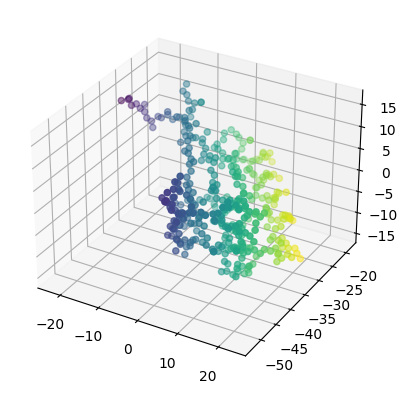

In [ ]:
show(all_arr['400'])

In [ ]:
# initialising _dictionary
ini_dict = all_arr
keys = ini_dict.keys()
print("keys : ", str(keys))

keys :  dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156

In [ ]:
keys = list(keys)
keys

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '13

In [ ]:
type(keys[0])

str

In [ ]:
newkeys =[]
for i in keys:
    i = int(i)
    newkeys.append(i)

In [ ]:
newkeys

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [ ]:
values = ini_dict.values()
print("values : ", str(values))

values :  dict_values([array([[ -8.99, -20.61,   2.38],
       [ -8.08, -19.67,   2.89],
       [ -8.19, -19.59,   4.4 ],
       ...,
       [  1.6 , -33.76,  14.41],
       [  2.22, -33.5 ,  15.81],
       [ -2.13, -30.86,  14.77]], dtype=float32), array([[ -3.8 , -19.7 ,   1.5 ],
       [ -5.26, -19.95,   1.54],
       [ -5.78, -20.72,   2.72],
       ...,
       [ -1.63, -31.3 ,  16.66],
       [ -1.1 , -32.73,  16.93],
       [ -3.8 , -29.  ,  13.22]], dtype=float32), array([[ -4.95, -18.76,   5.08],
       [ -5.1 , -20.19,   4.64],
       [ -5.13, -21.13,   5.85],
       ...,
       [ -1.92, -32.65,  18.11],
       [ -0.53, -33.34,  18.34],
       [ -3.68, -29.61,  14.82]], dtype=float32), array([[ -4.47, -20.38,   5.61],
       [ -5.62, -20.8 ,   4.74],
       [ -6.51, -21.65,   5.66],
       ...,
       [ -5.05, -28.04,  18.36],
       [ -4.86, -26.53,  18.53],
       [ -4.91, -28.29,  13.87]], dtype=float32), array([[ -4.17, -20.55,   6.44],
       [ -5.4 , -20.6 ,   5.6 ],
   

## convert the data from dictionary to list

In [ ]:
all_conformations =[]
for item in all_arr.values():
    val= item
    all_conformations.append(val)

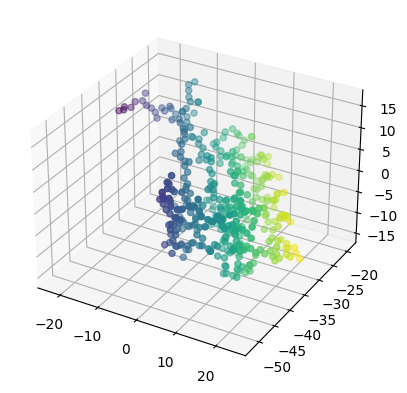

In [ ]:
show (all_conformations[400])

In [ ]:
print (all_conformations)

[array([[ -8.99, -20.61,   2.38],
       [ -8.08, -19.67,   2.89],
       [ -8.19, -19.59,   4.4 ],
       ...,
       [  1.6 , -33.76,  14.41],
       [  2.22, -33.5 ,  15.81],
       [ -2.13, -30.86,  14.77]], dtype=float32), array([[ -3.8 , -19.7 ,   1.5 ],
       [ -5.26, -19.95,   1.54],
       [ -5.78, -20.72,   2.72],
       ...,
       [ -1.63, -31.3 ,  16.66],
       [ -1.1 , -32.73,  16.93],
       [ -3.8 , -29.  ,  13.22]], dtype=float32), array([[ -4.95, -18.76,   5.08],
       [ -5.1 , -20.19,   4.64],
       [ -5.13, -21.13,   5.85],
       ...,
       [ -1.92, -32.65,  18.11],
       [ -0.53, -33.34,  18.34],
       [ -3.68, -29.61,  14.82]], dtype=float32), array([[ -4.47, -20.38,   5.61],
       [ -5.62, -20.8 ,   4.74],
       [ -6.51, -21.65,   5.66],
       ...,
       [ -5.05, -28.04,  18.36],
       [ -4.86, -26.53,  18.53],
       [ -4.91, -28.29,  13.87]], dtype=float32), array([[ -4.17, -20.55,   6.44],
       [ -5.4 , -20.6 ,   5.6 ],
       [ -6.49, -21.42,  

## convert the list to array

In [ ]:
all_conformations_atoms= np.array(all_conformations)
all_conformations_atoms

array([[[ -8.99, -20.61,   2.38],
        [ -8.08, -19.67,   2.89],
        [ -8.19, -19.59,   4.4 ],
        ...,
        [  1.6 , -33.76,  14.41],
        [  2.22, -33.5 ,  15.81],
        [ -2.13, -30.86,  14.77]],

       [[ -3.8 , -19.7 ,   1.5 ],
        [ -5.26, -19.95,   1.54],
        [ -5.78, -20.72,   2.72],
        ...,
        [ -1.63, -31.3 ,  16.66],
        [ -1.1 , -32.73,  16.93],
        [ -3.8 , -29.  ,  13.22]],

       [[ -4.95, -18.76,   5.08],
        [ -5.1 , -20.19,   4.64],
        [ -5.13, -21.13,   5.85],
        ...,
        [ -1.92, -32.65,  18.11],
        [ -0.53, -33.34,  18.34],
        [ -3.68, -29.61,  14.82]],

       ...,

       [[-16.26, -20.27,  17.29],
        [-16.82, -21.15,  16.2 ],
        [-15.83, -21.04,  14.99],
        ...,
        [-11.91, -27.13,  13.78],
        [-12.24, -26.77,  15.23],
        [ -7.66, -28.08,  12.67]],

       [[-21.78, -21.53,   9.62],
        [-21.01, -22.73,   9.99],
        [-19.5 , -22.43,   9.92],
        .

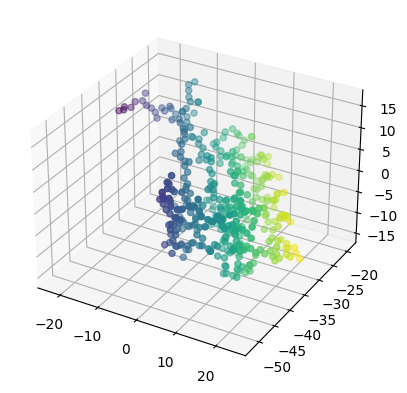

In [ ]:
show(all_conformations_atoms[400])

In [ ]:
all_conformations_atoms.shape

(500, 392, 3)

## Dataset & Dataloader

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class CustomDataset(Dataset):

    def __init__(self,newkeys ,all_conformations_atoms):
        'Initialization'
        self.all_conformations_atoms = all_conformations_atoms
        self.list_models = newkeys

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.all_conformations_atoms)


    def __getitem__(self,idx):
        'Generates one sample of data'
        X = self.all_conformations_atoms[idx]
        y = self.list_models[idx]
        return X

dataset = CustomDataset(newkeys,all_conformations_atoms )
BATCH_SIZE = 4
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
for (idx ,batch) in enumerate(dataloader):
    gt_samples = batch
    print (gt_samples)

tensor([[[  1.8400, -21.6000,  13.3200],
         [  0.5000, -21.4800,  13.9000],
         [ -0.4600, -21.0200,  12.8400],
         ...,
         [ -2.6500, -25.8900,  12.5300],
         [ -1.5200, -25.5400,  13.5300],
         [ -2.7200, -30.2600,  11.0100]],

        [[-19.1300, -20.3300,  15.3300],
         [-18.3400, -20.7300,  14.1800],
         [-17.6400, -22.0100,  14.4500],
         ...,
         [  0.3500, -28.4800,  16.5700],
         [ -0.4700, -28.5800,  17.8600],
         [ -1.1500, -29.7300,  12.3300]],

        [[-10.9700, -25.2700,   2.3300],
         [-10.4400, -25.1300,   3.7100],
         [-11.4500, -25.3200,   4.8900],
         ...,
         [  0.6300, -27.7000,  16.4500],
         [  0.2800, -26.1900,  16.4100],
         [ -0.5500, -28.1600,  12.1100]],

        ...,

        [[-18.5000, -21.6200,   6.8800],
         [-17.7600, -22.8200,   7.4600],
         [-16.6800, -22.3500,   8.3500],
         ...,
         [  0.7000, -27.1800,  16.8200],
         [ -0.5900, -2

In [ ]:
print((gt_samples[0]).shape)

torch.Size([392, 3])


In [ ]:
gt_samples[0]

tensor([[ -8.9900, -20.6100,   2.3800],
        [ -8.0800, -19.6700,   2.8900],
        [ -8.1900, -19.5900,   4.4000],
        ...,
        [  1.6000, -33.7600,  14.4100],
        [  2.2200, -33.5000,  15.8100],
        [ -2.1300, -30.8600,  14.7700]])

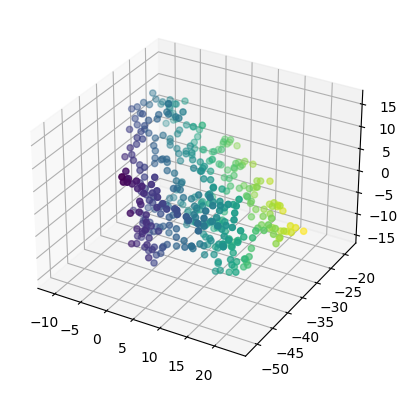

In [ ]:
show((gt_samples[0]))

## Alignment and kabsch torch

In [ ]:
def kabsch_torch(X: torch.Tensor, Y: torch.Tensor):
    """Kabsch alignment of X into Y.
    Assumes X,Y are both (D, N) - usually (3, N)
    """
    #print("X shape:", X.shape)
    #  center X and Y to the origin
    X_ = X - X.mean(dim=-1, keepdim=True)
    Y_ = Y - Y.mean(dim=-1, keepdim=True)
    # calculate convariance matrix (for each prot in the batch)
    C = torch.matmul(X_, Y_.t())
    # Optimal rotation matrix via SVD - warning! W must be transposed
    V, S, W = torch.svd(C.detach())
    # determinant sign for direction correction
    d = (torch.det(V) * torch.det(W)) < 0.0
    if d:
        S[-1] = S[-1] * (-1)
        V[:, -1] = V[:, -1] * (-1)
    # Create Rotation matrix U
    U = torch.matmul(V, W.t())
    # calculate rotations
    X_ = torch.matmul(X_.t(), U).t()
    # return centered and aligned
    return X_,Y_

In [ ]:
def batch_kabsch_torch_loss(
    X: torch.Tensor, Y: torch.Tensor, mse: bool = True, device="cuda"
):
    """Kabsch alignment of X into Y.
    Assumes X,Y are both (B, D, N) - usually (B, 3, N)
    """
    z1, z2 = None, None

    for i in range(X.size(0)):
        X_, Y_ = kabsch_torch(X[i], Y[i])
        if z1 is None:
            z1, z2 = X_, Y_
        else:
            z1, z2 = torch.cat((z1, X_)), torch.cat((z2, Y_))
    return z1,z2


## Initialize the model

In [ ]:
from typing import List, Callable, Union, Any, TypeVar, Tuple
from torch import Tensor
from torch import nn
from abc import abstractmethod

class BaseAE(nn.Module):

    def __init__(self) -> None:
        super(BaseAE, self).__init__()

    def encode(self, input: Tensor) -> List[Tensor]:
        raise NotImplementedError

    def decode(self, input: Tensor) -> Any:
        raise NotImplementedError

    def sample_interpolate(self,
                       num_samples:int,
                       z1: Tensor,
                       z2: Tensor,
                       steps: int ) -> Tensor:
        raise NotImplementedError

    @abstractmethod
    def forward(self, *inputs: Tensor) -> Tensor:
        pass

    @abstractmethod
    def loss_function(self, *inputs: Any, **kwargs) -> Tensor:
        pass

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import mean_squared_error
mse = nn.MSELoss()


class SimpleAE(BaseAE):
    def __init__(self, in_channels: int=3, latent_dim: int=100, hidden_dims: List = None) -> None:
        super(SimpleAE, self).__init__()

        self.latent_dim = latent_dim
        self.in_channels = in_channels

# batch * number of atoms * 3 --> matrix 1 multiplied 3"in channels" * number of atoms * 3 "degree of freedom " which means 3 times number of atoms
        if hidden_dims is None:
            hidden_dims = [392,392,392,392]

        ori_in_channels = in_channels

        # Build Encoder
        modules = []
        for h_dim in hidden_dims:
            modules.append(
                nn.Sequential(
                    nn.Linear(in_channels,h_dim),
                    #nn.Dropout(p=0.2),
                    nn.BatchNorm1d(h_dim),
                    nn.LeakyReLU())
            )
            in_channels = h_dim
# batch norm --> N : batch size , c : number of features , L : length of sequence

        self.latent_layer = nn.Linear (h_dim, latent_dim)
        self.encoder = nn.Sequential(*modules)
        # Build Decoder
        modules = []
        de_hidden_dims = [hidden_dims[-1]] + hidden_dims

        self.decoder_input = nn.Linear(latent_dim, hidden_dims[-1])
        hidden_dims.reverse()

        for i in range(len(de_hidden_dims) - 1):
            modules.append(
                nn.Sequential(
                    nn.Linear(de_hidden_dims[i], de_hidden_dims[i + 1]),
                    #nn.Dropout(p=0.2),
                    nn.BatchNorm1d(de_hidden_dims[i + 1]),
                    nn.LeakyReLU())
            )

        self.decoder = nn.Sequential(*modules)
        self.final_layer = nn.Sequential(
                            nn.Linear(de_hidden_dims[-1],ori_in_channels))

    def encode(self, input: Tensor) -> List[Tensor]:

        encoderresult = self.encoder(input)
        #mean_result = encoderresult.mean(dim= 1)
        z = self.latent_layer(encoderresult)
        return z

    def decode(self, z: Tensor) -> Tensor:
        #rec_result = z.unsqueeze(1)
        #trans_rec_result = rec_result.transpose(1,2)
        #L= nn.Linear(1,392)
        #old_res = L(trans_rec_result)
        #trans_old_res = old_res.transpose(1,2)
        result = self.decoder_input(z)
        result = self.decoder(result)
        result = self.final_layer(result)
        return result

    def forward(self, input: Tensor) -> List[Tensor]:
        z = self.encode(input)
        return  [self.decode(z), input]

    def loss_function(self, forward_res) -> dict:

        recons = forward_res[0]
        input = forward_res[1]

        recons= recons.transpose(1,2)
        input= input.transpose(1,2)

        var1,var2 =batch_kabsch_torch_loss(recons, input)
        recons_loss = mse(var1,var2)
        return {'Reconstruction_Loss':recons_loss}


    def sample_interpolate(self,
                       num_samples:int,
                       z1: Tensor,
                       z2: Tensor,
                       steps: int) -> Tensor:

        alphas = torch.linspace(0, 1, steps)
        z_interp = torch.stack([(1 - alpha) * z1 + alpha * z2 for alpha in alphas])
        z_interp = z_interp.view(-1, self.latent_dim)
        samples = self.decode(z_interp)
        x_interp = samples.view(num_samples, -1, self.in_channels)
        return x_interp.detach().numpy()



## Iterate over the input files to convert them to npy and then pdb

In [ ]:
from numpy import save
c=1
for i in all_conformations_atoms:
    conformation = i
    save(str(c)+'_input_2QKE.npy',conformation)
    c=c+1

In [ ]:
!sed -i 's/\r$//' trial3.sh

In [ ]:
#! touch trial3.sh

In [ ]:
! bash trial3.sh

# Training

In [ ]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

if __name__ == '__main__':
    data = all_conformations_atoms

    model = SimpleAE(latent_dim=100)
    model.to(get_device_str())

    optim= torch.optim.Adam(model.parameters(), lr=5e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optim, step_size=1000, gamma=.7)

    iter_num = 300
    qbar = tqdm(total=iter_num)
    clipping_value = 1

    all_gen = torch.tensor(())
    for iter in range(iter_num):
        for idx ,batch in enumerate(dataloader):
             gt_samples = batch
             forward_res = model(get_the_samples)
             recons_loss = model.loss_function(forward_res)
             recons_loss['Reconstruction_Loss'].backward()
             optim.step()
             scheduler.step()


        if iter== iter_num -1:
            all_gen = torch.cat((all_gen,forward_res[0]),dim=0)

        qbar.set_description(desc=f"step: {iter}, recons_loss: {format(recons_loss['Reconstruction_Loss'], '.3f')}.")
        torch.nn.utils.clip_grad_norm_(model.parameters(), clipping_value)
        qbar.update(1)
    plt.close()

    pass


step: 299, recons_loss: 0.142.: 100%|██████████| 300/300 [15:36<00:00,  3.12s/it]

step: 299, recons_loss: 0.080.: 100%|██████████| 300/300 [12:20<00:00,  2.24s/it]

## Saving the model

In [ ]:
torch.save(model.state_dict(), '/content/model_for_2QKE')

In [ ]:
model.load_state_dict(torch.load('/content/model_for_2QKE'))

<All keys matched successfully>

# Reconstruct after training

In [ ]:
len(all_gen)

500

In [ ]:
import numpy
with torch.no_grad():
    arrgenn = numpy.array(all_gen)

In [ ]:
arrgenn.shape

(500, 392, 3)

#  Sampling

In [ ]:
for (idx ,batch) in enumerate(dataloader):
    gt_samples = batch
    x1 = gt_samples[0]
    x2 = gt_samples[3]
    break

In [ ]:
data1 = model.encode(x1)
data2 = model.encode(x2)
sampled_data = model.sample_interpolate(num_samples=10, z1=data1, z2=data2, steps=10)

In [ ]:
sampled_data.shape

(10, 392, 3)

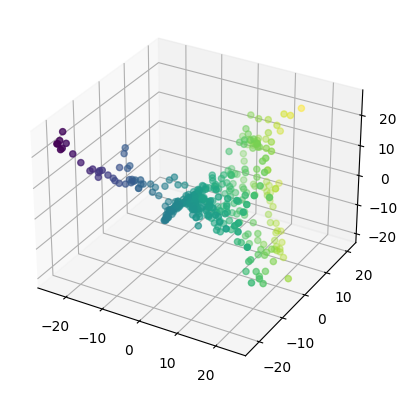

In [ ]:
show(sampled_data[9])

In [ ]:
from numpy import asarray
from numpy import save
save('sampleddata_2QKEyarabbb.npy',sampled_data[4])

## Iterates through all the generated conformations to convert them to npy then to PDB

In [ ]:
c=1
for i in arrgenn:
    conformation = i
    save(str(c)+'_output_2QKE.npy',conformation)
    c=c+1

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [81.0 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,079 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [31.2 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,366 kB]
Hit:13 http://ppa.la

In [ ]:
!apt-get install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 374 kB of archives.
After this operation, 1,342 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 dos2unix amd64 7.4.0-2 [374 kB]
Fetched 374 kB in 1s (726 kB/s)
Selecting previously unselected package dos2unix.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../dos2unix_7.4.0-2_amd64.deb ...
Unpacking dos2unix (7.4.0-2) ...
Setting up dos2unix (7.4.0-2) ...
Processing triggers for man-db (2.9.1-1) ...


In [ ]:
!dos2unix trial.sh

dos2unix: converting file trial.sh to Unix format...


In [ ]:
!sed -i 's/\r$//' trial.sh

In [ ]:
#! touch trial.sh

In [ ]:
! bash trial.sh

## saving all the"NPY, PDB" to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir_for_all_npy = '/content/pymol/dir_for_all_npy'
dir_for_all_pdb = '/content/pymol/dir_for_all_pdb'
os.makedirs(dir_for_all_npy)
os.makedirs(dir_for_all_pdb)

In [ ]:
import os
import shutil
src_dir = '/content/pymol'
dst_dir = '/content/pymol/dir_for_all_npy'
for filename in os.listdir(src_dir):
    if filename.endswith('.npy'):
        src_file = os.path.join(src_dir, filename)
        dst_file = os.path.join(dst_dir, filename)
        shutil.copy2(src_file, dst_file)

In [ ]:
import os
import shutil
src_dir = '/content/pymol'
dst_dir = '/content/pymol/dir_for_all_pdb'
for filename in os.listdir(src_dir):
    if filename.endswith('.pdb'):
        src_file = os.path.join(src_dir, filename)
        dst_file = os.path.join(dst_dir, filename)
        shutil.copy2(src_file, dst_file)

# Cross Validation: iterate over the input and output pairs to calculate RMSD

In [ ]:
import os
counter = 1
list_of_files = []
directory = '/content/pymol'
files = sorted (os.listdir(directory))


for filename in files:
  for filename2 in files:
    filename = str(counter)+'_input_2QKE.pdb'
    filename2 = str(counter)+ '_output_2QKE.pdb'
    if os.path.isfile (filename) and  os.path.isfile (filename2):
      list_of_files.append(filename)
      list_of_files.append(filename2)
      counter= counter+1

  if (counter >500):
    break

In [ ]:
length_of_all_files_list = len(list_of_files)
length_of_all_files_list

1000

In [ ]:
list_of_files

['1_input_2QKE.pdb',
 '1_output_2QKE.pdb',
 '2_input_2QKE.pdb',
 '2_output_2QKE.pdb',
 '3_input_2QKE.pdb',
 '3_output_2QKE.pdb',
 '4_input_2QKE.pdb',
 '4_output_2QKE.pdb',
 '5_input_2QKE.pdb',
 '5_output_2QKE.pdb',
 '6_input_2QKE.pdb',
 '6_output_2QKE.pdb',
 '7_input_2QKE.pdb',
 '7_output_2QKE.pdb',
 '8_input_2QKE.pdb',
 '8_output_2QKE.pdb',
 '9_input_2QKE.pdb',
 '9_output_2QKE.pdb',
 '10_input_2QKE.pdb',
 '10_output_2QKE.pdb',
 '11_input_2QKE.pdb',
 '11_output_2QKE.pdb',
 '12_input_2QKE.pdb',
 '12_output_2QKE.pdb',
 '13_input_2QKE.pdb',
 '13_output_2QKE.pdb',
 '14_input_2QKE.pdb',
 '14_output_2QKE.pdb',
 '15_input_2QKE.pdb',
 '15_output_2QKE.pdb',
 '16_input_2QKE.pdb',
 '16_output_2QKE.pdb',
 '17_input_2QKE.pdb',
 '17_output_2QKE.pdb',
 '18_input_2QKE.pdb',
 '18_output_2QKE.pdb',
 '19_input_2QKE.pdb',
 '19_output_2QKE.pdb',
 '20_input_2QKE.pdb',
 '20_output_2QKE.pdb',
 '21_input_2QKE.pdb',
 '21_output_2QKE.pdb',
 '22_input_2QKE.pdb',
 '22_output_2QKE.pdb',
 '23_input_2QKE.pdb',
 '23_o

In [ ]:
#! touch trial2.sh

In [ ]:
!sed -i 's/\r$//' trial2.sh

In [ ]:
import subprocess
c1= 0
c2= 1
for file in list_of_files:
  x = list_of_files[c1]
  y = list_of_files[c2]
  subprocess.call(['bash','trial2.sh',x,y])
  if (c1 == length_of_all_files_list -2):
    break
  else:
    c1+=2
    c2+=2

In [ ]:
#! touch trial_yarab_tozbot.sh

In [ ]:
!sed -i 's/\r$//' trial_yarab_tozbot.sh

In [ ]:
! bash trial_yarab_tozbot.sh

# Concatenation of TSV files for inputs and outputs

In [ ]:
#! touch trial4.sh

In [ ]:
!sed -i 's/\r$//' trial4.sh

In [ ]:
! bash trial4.sh

# Diversity

# RMSD for the inputs

In [ ]:
# 1_ calculate the rmsd
# 2_ move all the files to another directory
# 3_ concatenate the rmsd together in one tsv file

In [ ]:
#! touch trial5.sh

In [ ]:
# iterate over the input files to calculate the rmsd
import subprocess
c1= 0
c2= 2
for file in list_of_files:
  x1 = list_of_files[c1]
  x2 = list_of_files[c2]
  subprocess.call(['bash','trial5.sh',x1,x2])
  if (c1 == length_of_all_files_list - 4):
    break
  else:
    c1+=4
    c2+=4

In [ ]:
# bash script to move all the inputs files rmsd to another directory
#! touch all_inp.sh

In [ ]:
! bash all_inp.sh

In [ ]:
# script to concatenate all the inputs rmsd together
#! touch trial6.sh

In [ ]:
!sed -i 's/\r$//' trial6.sh

In [ ]:
! bash trial6.sh

# RMSD for the outputs

In [ ]:
# iterate over the output files to calculate the rmsd
import subprocess
c1= 1
c2= 3
for file in list_of_files:
  x1 = list_of_files[c1]
  x2 = list_of_files[c2]
  subprocess.call(['bash','trial5.sh',x1,x2])
  if (c1 == length_of_all_files_list-3):
    break
  else:
    c1+=4
    c2+=4

In [ ]:
# moving the files to another directory

In [ ]:
#! touch all_out.sh

In [ ]:
! bash all_out.sh

In [ ]:
# concatenate the output rmsd together
#! touch trial7.sh

In [ ]:
!sed -i 's/\r$//' trial7.sh

In [ ]:
! bash trial7.sh

# Reading TSV and plotting histogram

In [ ]:
cd /content/pymol/dir_for_inp_out

/content/pymol/dir_for_inp_out


In [ ]:
# all_ rmsd is the file that concatenate the files of cross validation
import pandas as pd
df = pd.read_csv('all_rmsd_inp_out.tsv', sep='\t')
print(df)

     100_input_2QKE_100_output_2QKE  1.037
0    101_input_2QKE_101_output_2QKE  0.938
1    102_input_2QKE_102_output_2QKE  0.820
2    103_input_2QKE_103_output_2QKE  0.888
3    104_input_2QKE_104_output_2QKE  0.944
4    105_input_2QKE_105_output_2QKE  1.022
..                              ...    ...
494    96_input_2QKE_96_output_2QKE  0.932
495    97_input_2QKE_97_output_2QKE  1.024
496    98_input_2QKE_98_output_2QKE  0.886
497    99_input_2QKE_99_output_2QKE  1.146
498      9_input_2QKE_9_output_2QKE  0.950

[499 rows x 2 columns]


<Axes: ylabel='Frequency'>

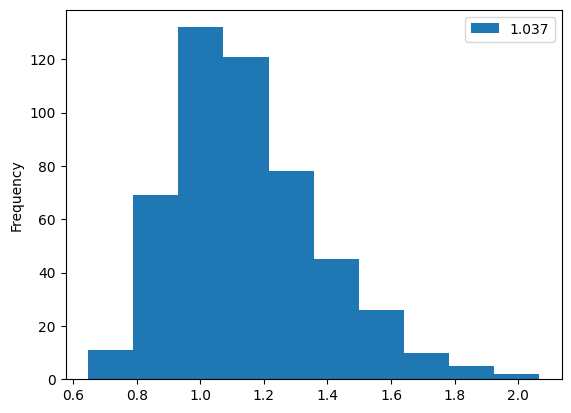

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind='hist')

In [ ]:
cd /content/pymol/dir_all_inp

/content/pymol/dir_all_inp


In [ ]:
df2 = pd.read_csv('all_rmsd_for_inputs.tsv', sep='\t')
print(df2)

     101_input_2QKE_102_input_2QKE  0.730
0    103_input_2QKE_104_input_2QKE  0.630
1    105_input_2QKE_106_input_2QKE  0.524
2    107_input_2QKE_108_input_2QKE  0.448
3    109_input_2QKE_110_input_2QKE  0.627
4    111_input_2QKE_112_input_2QKE  0.674
..                             ...    ...
244    93_input_2QKE_94_input_2QKE  0.673
245    95_input_2QKE_96_input_2QKE  0.417
246    97_input_2QKE_98_input_2QKE  0.554
247   99_input_2QKE_100_input_2QKE  0.602
248     9_input_2QKE_10_input_2QKE  0.450

[249 rows x 2 columns]


<Axes: ylabel='Frequency'>

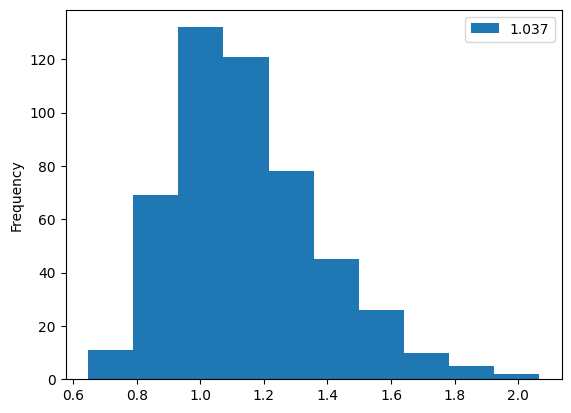

In [ ]:
df.plot(kind='hist')

In [ ]:
cd /content/pymol/dir_all_out

/content/pymol/dir_all_out


In [ ]:
df3 = pd.read_csv('all_rmsd_for_outputs.tsv', sep='\t')
print(df3)

     101_output_2QKE_102_output_2QKE  0.434
0    103_output_2QKE_104_output_2QKE  0.194
1    105_output_2QKE_106_output_2QKE  0.398
2    107_output_2QKE_108_output_2QKE  0.281
3    109_output_2QKE_110_output_2QKE  0.386
4    111_output_2QKE_112_output_2QKE  0.286
..                               ...    ...
244    93_output_2QKE_94_output_2QKE  0.606
245    95_output_2QKE_96_output_2QKE  0.607
246    97_output_2QKE_98_output_2QKE  0.209
247   99_output_2QKE_100_output_2QKE  0.674
248     9_output_2QKE_10_output_2QKE  0.133

[249 rows x 2 columns]


<Axes: ylabel='Frequency'>

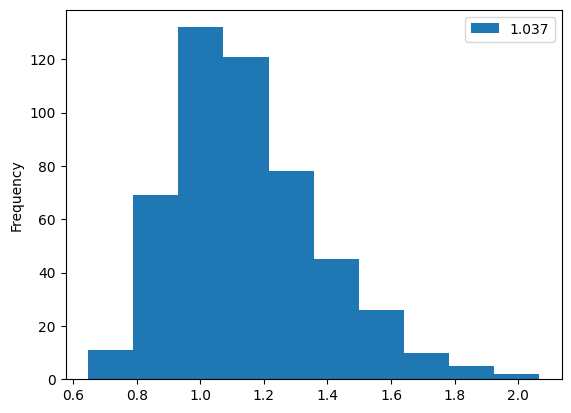

In [ ]:
df.plot(kind='hist')

## saving all the tsv directories to drive

In [ ]:
import shutil

In [ ]:
src_dir = '/content/pymol/dir_for_inp_out'
dst_dir = '/content/pymol/dir_for_all_inputandoutput'
shutil.copytree(src_dir, dst_dir)

'/content/pymol/dir_for_all_inputandoutput'

In [ ]:
src_dir = '/content/pymol/dir_all_inp'
dst_dir = '/content/pymol/dir_for_all_input'
shutil.copytree(src_dir, dst_dir)

'/content/pymol/dir_for_all_input'

In [ ]:
src_dir = '/content/pymol/dir_all_out'
dst_dir = '/content/pymol/dir_for_all_output'
shutil.copytree(src_dir, dst_dir)

'/content/pymol/dir_for_all_output'

## Dssp

In [ ]:
import numpy as np

# read the DSSP file
with open('/content/400_input_dssp.dssp', 'r') as f:
    lines = f.readlines()

# extract the secondary structure assignments
ss = []
for line in lines:
    if line.startswith('  #  RESIDUE'):
        continue
    elif line.startswith('  #'):
        break
    else:
        ss.append(line[16])

# convert the secondary structure assignments to a NumPy array
ss_array = np.array(ss)

In [ ]:
import numpy as np

# read the input and output DSSP files
with open('/content/400_input_dssp.dssp', 'r') as f:
    input_lines = f.readlines()

with open('/content/400_output_dssp.dssp', 'r') as f:
    output_lines = f.readlines()

# extract the secondary structure assignments from the input and output files
input_ss = []
output_ss = []
for line in input_lines:
    if line.startswith('  #  RESIDUE'):
        continue
    elif line.startswith('  #'):
        break
    else:
        input_ss.append(line[16])
for line in output_lines:
    if line.startswith('  #  RESIDUE'):
        continue
    elif line.startswith('  #'):
        break
    else:
        output_ss.append(line[16])

# calculate the Q3 score
num_correct = np.sum(np.array(input_ss) == np.array(output_ss))
num_total = len(input_ss)
q3 = num_correct / num_total

print("Q3 score: {:.2f}".format(q3))